<a href="https://colab.research.google.com/github/prayagtim/Predicting-pnemonia-using-chest-X-rays/blob/master/Pnemonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prayagjain","key":"ed50f60f3b69696069c0885924fd347b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json -p ~/.kaggle/

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:19<00:00, 35.3MB/s]
100% 2.29G/2.29G [00:19<00:00, 124MB/s] 


In [ ]:
!unzip /content/chest-xray-pneumonia.zip

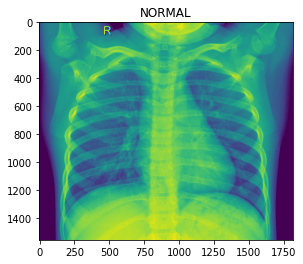

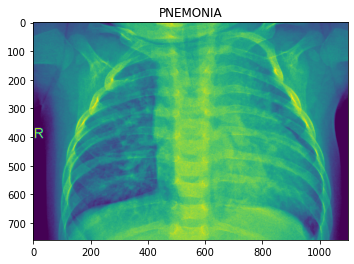

In [ ]:
#Visualising Data
import matplotlib.image as img
import matplotlib.pyplot as plt
import os
base_dir1='/content/chest_xray/train/NORMAL/'
base_dir2='/content/chest_xray/train/PNEUMONIA/'
normallist=os.listdir(base_dir1)
pnemonialist=os.listdir(base_dir2)
for i in range (1):
  k=(base_dir1,normallist[i])
  k=''.join(k)
  plt.title('NORMAL')
  plt.imshow(img.imread(k))
  plt.show()
  l=(base_dir2,pnemonialist[i])
  l=''.join(l)
  plt.title('PNEMONIA')
  plt.imshow(img.imread(l))
  plt.show()
  

In [ ]:
import tensorflow as tf

In [ ]:
#Model
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),     
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')            
                                                  
])

In [ ]:
model.compile(optimizer='RMSprop', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Preparing Training Dataset
Traingenerator=ImageDataGenerator(rescale=1/255, 
        rotation_range = 30,  
        zoom_range = 0.2,  
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip = True,  
        )  

#preparingValidation Dataset
Validationgenerator=ImageDataGenerator(rescale=1/255,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


                                       
TrainData='/content/chest_xray/train'
ValidationData='/content/chest_xray/val'
Traindata=Traingenerator.flow_from_directory(TrainData,
        target_size=(150,150),class_mode='binary',batch_size=10)

Validationdata=Validationgenerator.flow_from_directory(ValidationData,
          # randomly rotate images in the range (degrees, 0 to 180)
       class_mode='binary',target_size=(150,150),batch_size=10)
    

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
k=model.fit_generator(Traindata,validation_data=Validationdata,epochs=10)

Epoch 1/10
522/522 [==============================] - 191s 366ms/step - loss: 0.2184 - accuracy: 0.9231 - val_loss: 1.1699 - val_accuracy: 0.6250
Epoch 2/10
522/522 [==============================] - 190s 365ms/step - loss: 0.2088 - accuracy: 0.9300 - val_loss: 0.7804 - val_accuracy: 0.6250
Epoch 3/10
522/522 [==============================] - 191s 366ms/step - loss: 0.2361 - accuracy: 0.9285 - val_loss: 2.0075 - val_accuracy: 0.5625
Epoch 4/10
522/522 [==============================] - 190s 364ms/step - loss: 0.2340 - accuracy: 0.9273 - val_loss: 1.6270 - val_accuracy: 0.5625
Epoch 5/10
522/522 [==============================] - 190s 364ms/step - loss: 0.2405 - accuracy: 0.9268 - val_loss: 0.4810 - val_accuracy: 0.6875
Epoch 6/10
522/522 [==============================] - 191s 365ms/step - loss: 0.1927 - accuracy: 0.9340 - val_loss: 1.0134 - val_accuracy: 0.5625
Epoch 7/10
522/522 [==============================] - 191s 367ms/step - loss: 0.4018 - accuracy: 0.9291 - val_loss: 0.6505 -

In [ ]:
model.evaluate(Validationdata)

2/2 [==============================] - 0s 39ms/step - loss: 0.5450 - accuracy: 0.7500


[0.5449983477592468, 0.75]

In [ ]:
testdata='/content/chest_xray/test'
Testgenerator=ImageDataGenerator(rescale=1/255)
Testdata=Testgenerator.flow_from_directory(testdata,target_size=(150,150),class_mode='binary',batch_size=10)
model.evaluate(Testdata)

Found 624 images belonging to 2 classes.
63/63 [==============================] - 9s 149ms/step - loss: 0.2477 - accuracy: 0.9247


[0.24769970774650574, 0.9246794581413269]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
l=model.predict(Testdata)
t=[]
for i in l:
  if i<0.5:
    i='normal'
    print(i)
  elif i>0.5:
    i='pnemonia'
    print(i)

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

In [ ]:
acc=k.history['accuracy']
loss=k.history['loss']
val_loss=k.history['val_loss']
val_acc=k.history['val_accuracy']


epochs=range(len(acc))

In [ ]:
print(acc)

[0.9231211543083191, 0.9300230145454407, 0.9284892678260803, 0.9273389577865601, 0.9267638325691223, 0.9340490698814392, 0.9290643930435181, 0.9281058311462402, 0.9290643930435181, 0.9288727045059204]


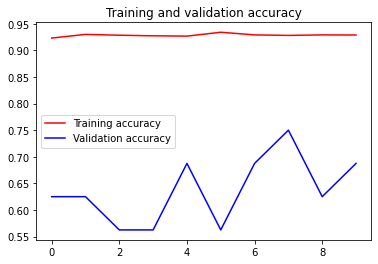

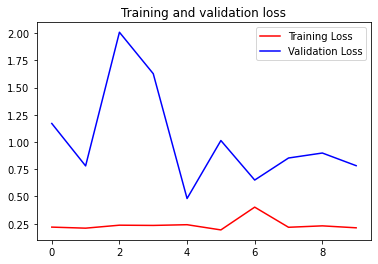

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()